## The following codes perform different visualizations including PCA projection, various manifold projections on the extracted features from Shakespear's  plays and poems. 

- We first import the libraries we are going to use, and the features we are going to visualize

In [7]:
## Trying different clustering methods on the extracted feature arrays
## More note can be found in the trial and test note.docx
%matplotlib inline 
from time import time
from sklearn import metrics
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.decomposition import PCA
# Next line to silence pyflakes. This import is needed.
Axes3D



# #import vectorized feature arrays for acts and scenes
act_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllAct_Features_Vectorize.txt',sep=',',header = None)
scene_Vect = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
play_Vect = pd.read_csv('VectorizedFeatures/AllComplied/ALLPlay_Features_Vectorize.txt',sep=',',header = None)

#import LSA reduced vectorized feature arrays for acts and scenes
act_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Act_Features_Vectorize_LSA.txt',sep=',',header = None)
scene_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Scene_Features_Vectorize_LSA.txt',sep=',',header = None )
play_Vect_LSA = pd.read_csv('LSA_VectorizedFeatures/Play_Features_Vectorize_LSA.txt',sep=',',header = None )

#import labels
act_Labels = pd.read_csv('LSA_VectorizedFeatures/act_feature_labels.txt',sep='\n',header = None)
scene_Labels= pd.read_csv('LSA_VectorizedFeatures/scene_feature_labels.txt',sep='\n',header = None )
play_Labels= pd.read_csv('LSA_VectorizedFeatures/play_feature_labels.txt',sep='\n',header = None )


act_Readability = pd.read_csv('Readability_Features/Act_Readability_Feature.txt',sep=',',header = None)
play_Readability = pd.read_csv('Readability_Features/Play_Readability_Feature.txt',sep=',',header = None)
scene_Readability = pd.read_csv('Readability_Features/Scene_Readability_Feature.txt',sep=',',header = None)


act_TTratio = pd.read_csv('TypeTokenRatioFeatures/Act_TTratio_.txt',sep=',',header = None)
scene_TTratio = pd.read_csv('TypeTokenRatioFeatures/Scene_TTratio_.txt',sep=',',header = None)

## Standardize matrix
def standardize(X):
    return StandardScaler().fit_transform(X)

# act_Readability = standardize(act_Readability)
# play_Readability = standardize(play_Readability)
# scene_Readability = standardize(scene_Readability)
# act_Vect = standardize(act_Vect)
# play_Vect = standardize(play_Vect)
# scene_Vect = standardize(scene_Vect)
# act_Vect_LSA  = standardize(act_Vect_LSA )
# play_Vect_LSA  = standardize(play_Vect_LSA )
# scene_Vect_LSA  = standardize(scene_Vect_LSA )
# act_TTratio  = standardize(act_TTratio)
# scene_TTratio  = standardize(scene_TTratio)

- Next we define functions to extract the features' corresponding labels: act name for act features,
scene name for scene features and play name for play features, and we store those labels in annot variable.

In [10]:
## Function to get the annotation label
def get_play_number(X):
    result = []
    num = 0
    for i in range(len(X)):
        try:
            if X[0][i].split("_")[0] != X[0][i+1].split("_")[0]:
                num = num + 1            
            result.append(num)
        except:
            result.append(num)
    return result

def get_act_number(X):
    result = []
    num = 0
    for i in range(len(X)):
        try:
            if X[0][i].split("_")[0] != X[0][i+1].split("_")[0]:
                num = num + 1            
            result.append(str(num) + "_" +X[0][i].split("_")[1])
        except:
            result.append(str(num) + "_" +X[0][i].split("_")[1])
    return result

def get_scene_number(X):
    result = []
    num = 0
    for i in range(len(X)):
        try:
            if X[0][i].split("_")[0] != X[0][i+1].split("_")[0]:
                num = num + 1 
            result.append(str(num) + "_" +X[0][i].split("_")[1] + "_" +X[0][i].split("_")[2])
        except:
            result.append(str(num) + "_" +X[0][i].split("_")[1] + "_" +X[0][i].split("_")[2])
    return result

play_annot = get_play_number(play_Labels)
act_annot = get_act_number(act_Labels)
scene_annot = get_scene_number(scene_Labels)

Next we define functions that visualize the data by projecting them on non-linear plans
We use various manifold projection methods including 
- LLE
- LTSA
- Hessian LLE
- Modified LLE
- Isomap
- MDS
- SpectralEmbedding
- t-SNE

In [3]:
## Adapated from http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#example-manifold-plot-compare-methods-py
## Visualize the plays by projecting them on non-linear plane to differ from the PCA projection
def manifold_projection(X,L=None, n_neighbors = 10,n_components = 2):
    
    
    fig = plt.figure(figsize=(25, 8))
    plt.suptitle("Manifold projection with %s , %i neighbors"
             % ("Shakespear plays", n_neighbors), fontsize=14)


    size = len(X)
    color = range(size)
    #color = annot
    color = [x/size for x in color]

    methods = ['standard', 'ltsa', 'hessian', 'modified']
    labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
    

   

    for i, method in enumerate(methods):
        t0 = time()
        Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                            eigen_solver='auto',
                                            method=method).fit_transform(X)
        t1 = time()
        print("%s: %.2g sec" % (methods[i], t1 - t0))

        ax = fig.add_subplot(252 + i)
        plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
        plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
        plt.axis('tight')

    t0 = time()
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Isomap (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')


    t0 = time()
    mds = manifold.MDS(n_components, max_iter=100, n_init=1)
    Y = mds.fit_transform(X)
    t1 = time()
    print("MDS: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(258)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("MDS (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')


    t0 = time()
    se = manifold.SpectralEmbedding(n_components=n_components,
                                    n_neighbors=n_neighbors)
    Y = se.fit_transform(X)
    t1 = time()
    print("SpectralEmbedding: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(259)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("t-SNE: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(250)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("t-SNE (%.2g sec)" % (t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (Y[:, 0][i], Y[:, 1][i]))
    plt.axis('tight')

    plt.show()

- Then we define functions to plot the unexplained variance ratio of PCA reduced components to choose the ideal number of components, and from the plots we can see 3 components are good at explaining a good portion of variance

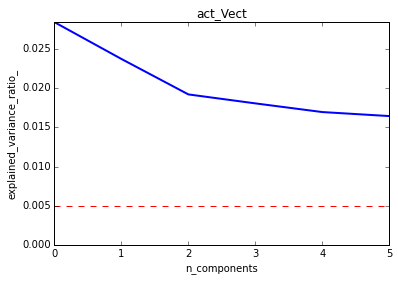


None


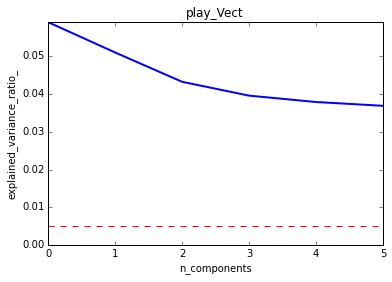


None


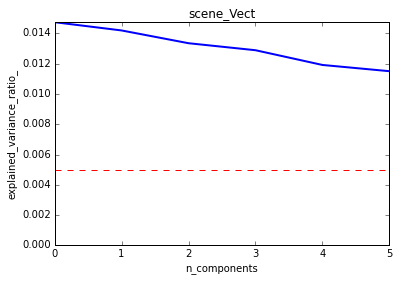


None


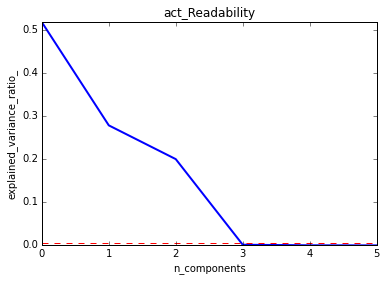


None


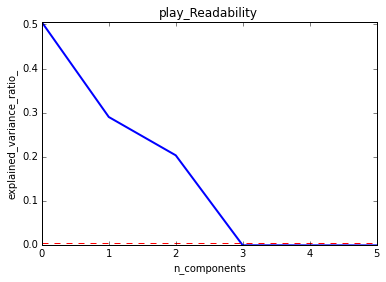


None


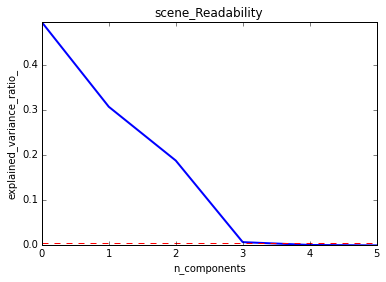


None


In [39]:
## Extract principal components , looking at variance explained of n components
# Using PCA
%matplotlib inline 
def getPCAPlot(X, title):
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)

    # Plot the PCA spectrum
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.title(title)
    plt.xlabel('n_components')
    plt.ylabel('unexplained_variance_ratio_')
    plt.axhline(y=0.005, color="red", linestyle="--")
    plt.xlim(0,5)
    plt.show()
    print('')

data = [act_Vect, play_Vect, scene_Vect,act_Readability,play_Readability,scene_Readability]
titles = ["act_Vect","play_Vect", "scene_Vect","act_Readability","play_Readability","scene_Readability"]
annot = [act_annot,play_annot,scene_annot,act_annot,play_annot,scene_annot]

    
# do for all data
for i in range(len(data)):
    # Standardize features before PCA
    data[i] = standardize(data[i])
    print(getPCAPlot(data[i], titles[i]))

    
## results show that we need only 3 components  

- Then we define functions to plot the PCA first two components from the dimension reduced features and to plot the Type Token
ratio feature which does not need PCA processed since it has only one dimension

PCA first 2 components projection: 0.23 sec


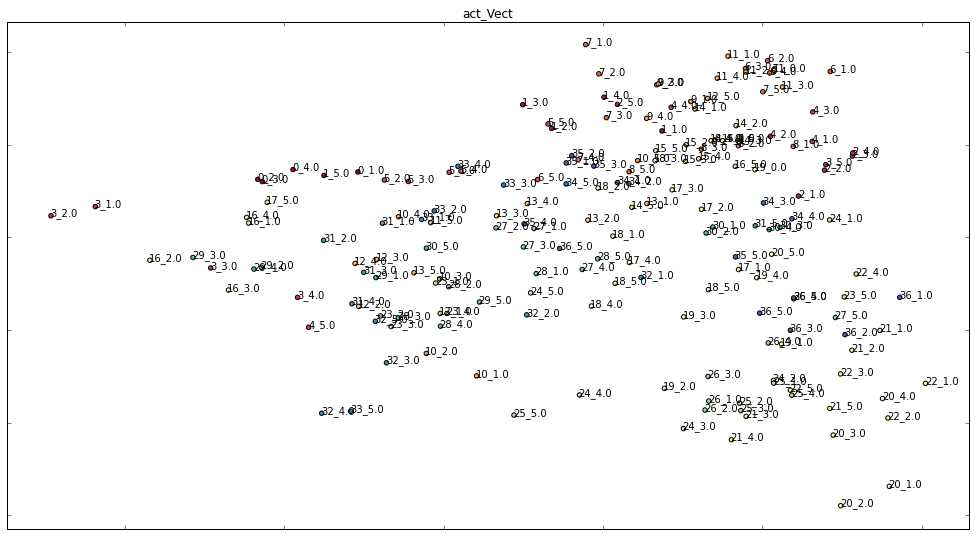

None
PCA first 2 components projection: 0.05 sec


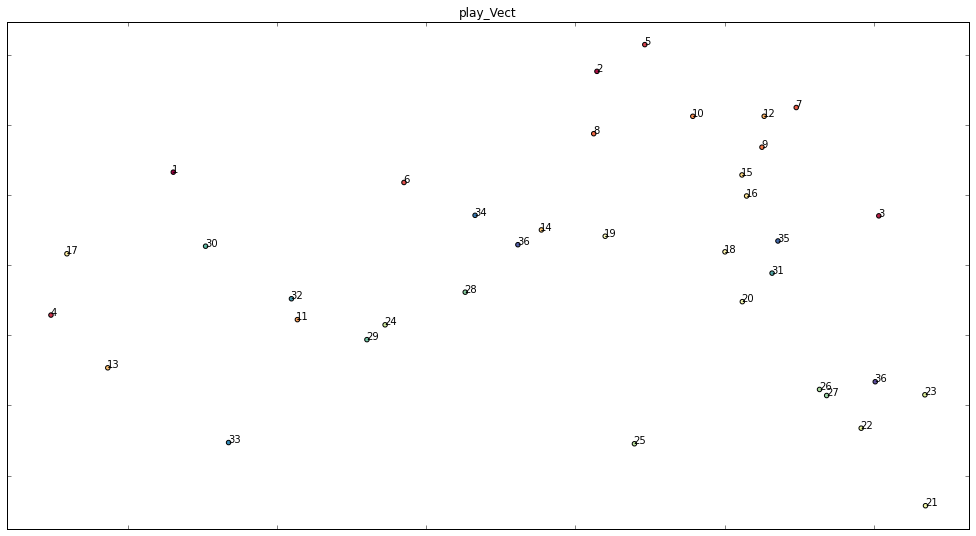

None
PCA first 2 components projection: 1.5 sec


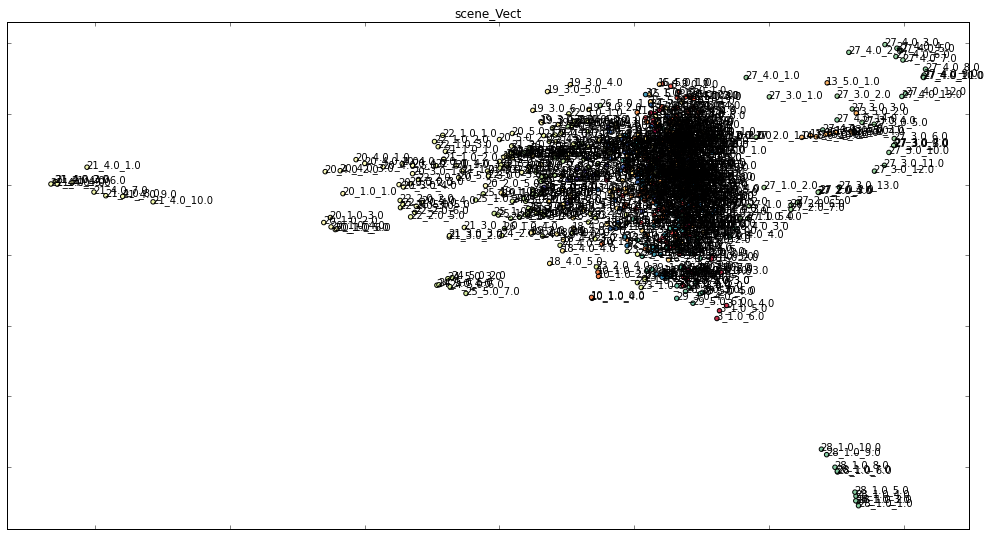

None
PCA first 2 components projection: 0.001 sec


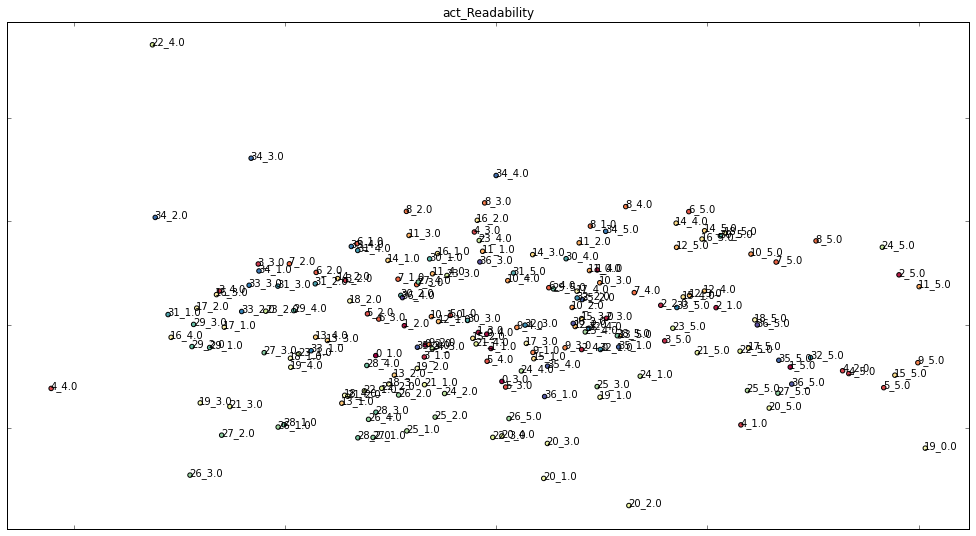

None
PCA first 2 components projection: 0.001 sec


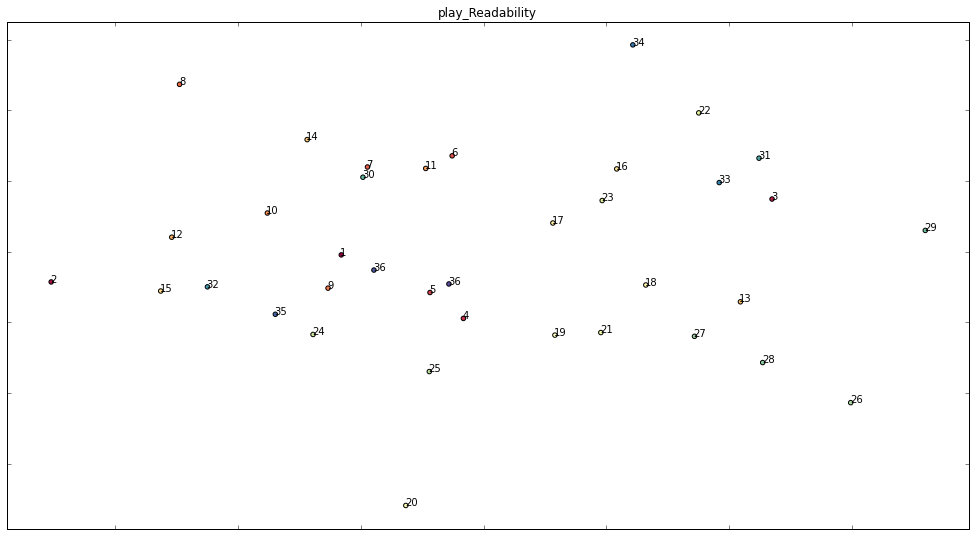

None
PCA first 2 components projection: 0.001 sec


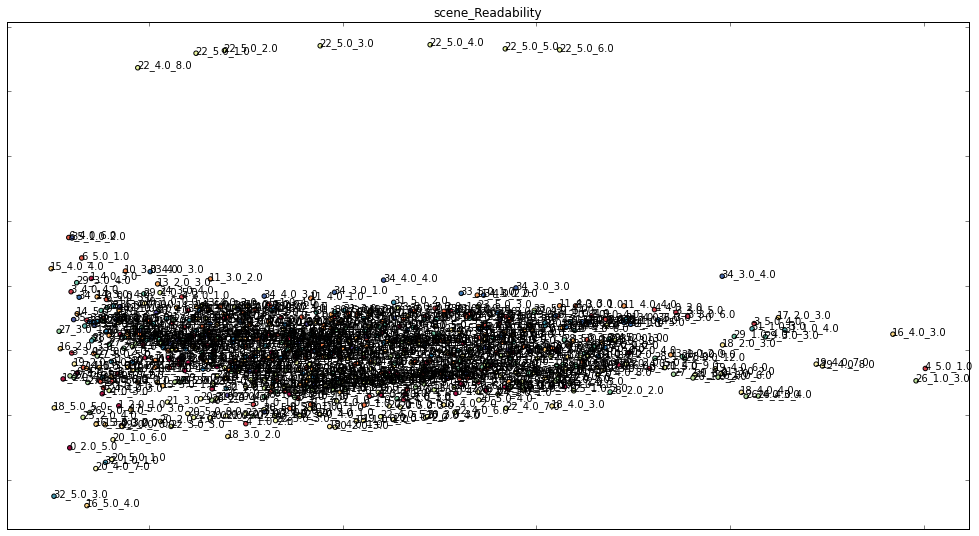

None
Type Token Ratio visualization: 0 sec


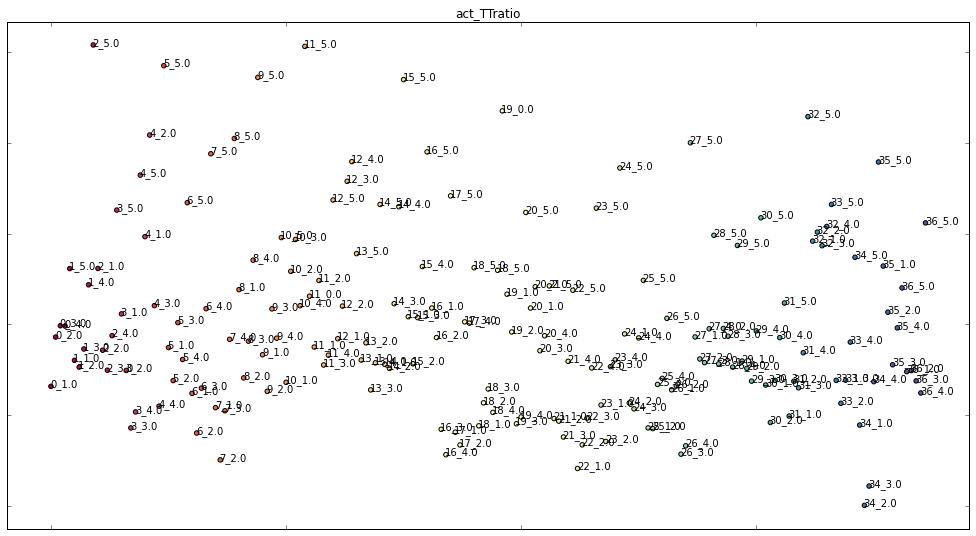

None
Type Token Ratio visualization: 0 sec


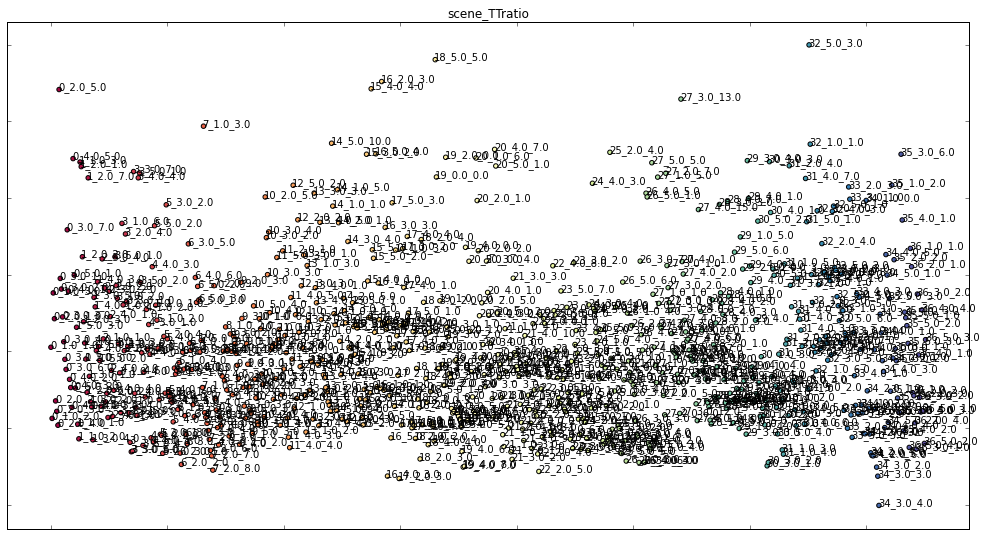

None


In [40]:
## Trying n components
def getPCA(X, n=3):
    pca = PCA(n)
    pca.fit(X)
    return pca.transform(X)


def PCA_projection(X,title,L=None,n_components = 3):
    if not (L is None):
        fig = plt.figure(figsize=(100, 20))
    else:
        fig = plt.figure(figsize=(30, 20))
    size = len(X)
    color = range(size)
    #color = annot
    color = [x/size for x in color]
    t0 = time()
    X = getPCA(X)
    t1 = time()
    print("PCA first 2 components projection: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
    #plt.title("PCA first 2 components projection (%.2g sec)" % (t1 - t0))
    plt.title(title)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (X[:, 0][i], X[:, 1][i]))
    plt.axis('tight')
    plt.show()
    
def TTratio_projection(X,title,L=None):
    if not (L is None):
        fig = plt.figure(figsize=(100, 20))
    else:
        fig = plt.figure(figsize=(30, 20))
    size = len(X)
    color = range(size)
    #color = annot
    color = [x/size for x in color]
    t0 = time()
    t1 = time()
    print("Type Token Ratio visualization: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(range(size), X, c=color, cmap=plt.cm.Spectral)
    #plt.title("PCA first 2 components projection (%.2g sec)" % (t1 - t0))
    plt.title(title)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    if not (L is None):
            for i, txt in enumerate(L):
                ax.annotate(txt, (range(size)[i], X[i]))
    plt.axis('tight')
    plt.show()

TTratio_data = [act_TTratio,scene_TTratio]
TTratio_titles = ["act_TTratio","scene_TTratio"]
TTratio_annot = [act_annot,scene_annot]


#PCA_projection(act_Vect,act_annot)
# do for all data
for i in range(len(data)):
    print(PCA_projection(data[i], titles[i],annot[i]))
    
for i in range(len(TTratio_data)):
    print(TTratio_projection(TTratio_data[i], TTratio_titles[i],TTratio_annot[i]))

### Results Analysis
- In the PCA processed unigram vectorization of Shakespears’ plays in each scene, we see that scenes from play 20,21,22,25,27,28 clusters in their own and seperated from the rest of scenes of plays. 
- In the PCA processed readability features of Shakespears’ plays in each scene, we see that scenes from paly 22 have a distinct level of readabiliy(syntactic features) than other plays.
- The Type Token Ratio feature is an one column vector, and thus there is no need to use PCA to reduce dimensions to visualize, here the x-axis is the play number, and the Y- axis shows the Type Token Ratio, and we can see some scenes from plays 0,7,17,15,16,18,22,27,32 have higher Type Token Ratio, indicating more vocabulary richness than the rest of plays.


Visualizing the act Readability features without labels... 

standard: 0.045 sec
ltsa: 0.044 sec
hessian: 0.12 sec
modified: 0.085 sec
Isomap: 0.043 sec
MDS: 0.14 sec
SpectralEmbedding: 0.074 sec
t-SNE: 0.44 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


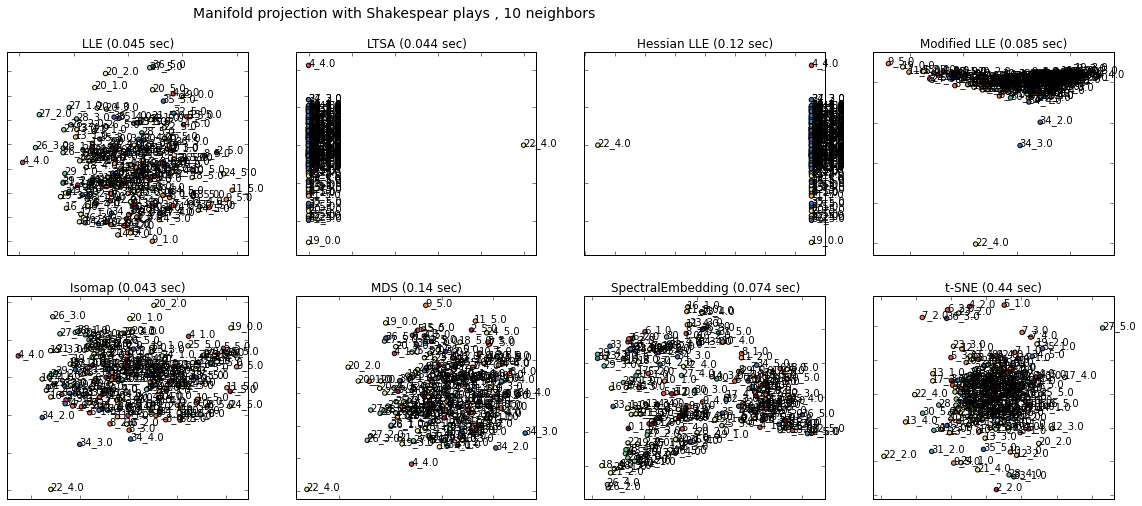


Visualizing the play Readability features without labels... 

standard: 0.012 sec
ltsa: 0.025 sec
hessian: 0.021 sec
modified: 0.034 sec
Isomap: 0.002 sec
MDS: 0.032 sec
SpectralEmbedding: 0.01 sec
t-SNE: 0.16 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


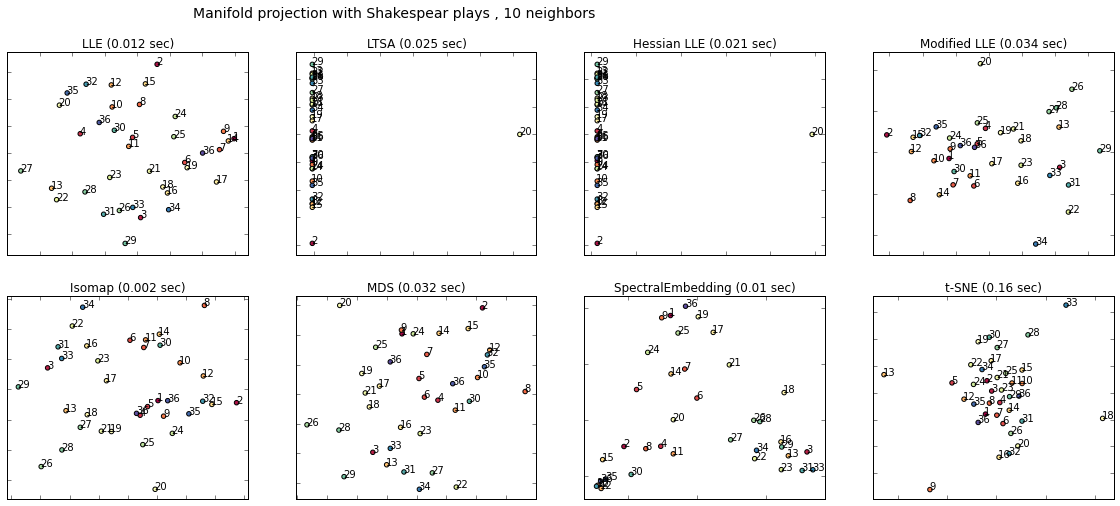

In [41]:
print("\nVisualizing the act Readability features without labels... \n")
manifold_projection(act_Readability,act_annot)
print("\nVisualizing the play Readability features without labels... \n")
manifold_projection(play_Readability,play_annot)
#print("\nVisualizing the scene Readability features without labels... \n")
#manifold_projection(scene_Readability)

### Results Analysis
- we can see that scenes 3 and 4 from play 22 , scene 0 from play 19 and scene 2 and 3 from play 34 appear quiet a few times as outliers than the rest plays
- In the scene unigram vectorization manifold projection graphs, we can see that some scenes from plays 11,15,19,22,23,24,34 quiet a few times as outliers than the rest plays:


Visualizing the play_Vect features without labels... 

standard: 0.055 sec
ltsa: 0.13 sec
hessian: 0.099 sec
modified: 0.1 sec
Isomap: 0.021 sec
MDS: 0.037 sec
SpectralEmbedding: 0.06 sec
t-SNE: 0.2 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


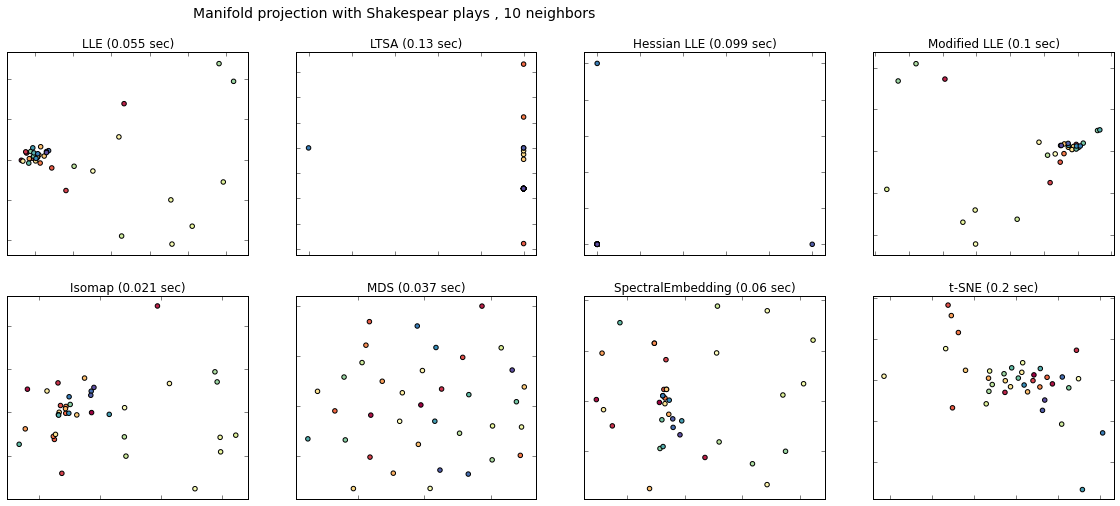


Visualizing the act_Vect features without labels... 

standard: 0.66 sec
ltsa: 0.72 sec
hessian: 0.64 sec
modified: 0.65 sec
Isomap: 0.41 sec
MDS: 0.15 sec
SpectralEmbedding: 0.4 sec
t-SNE: 1.2 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


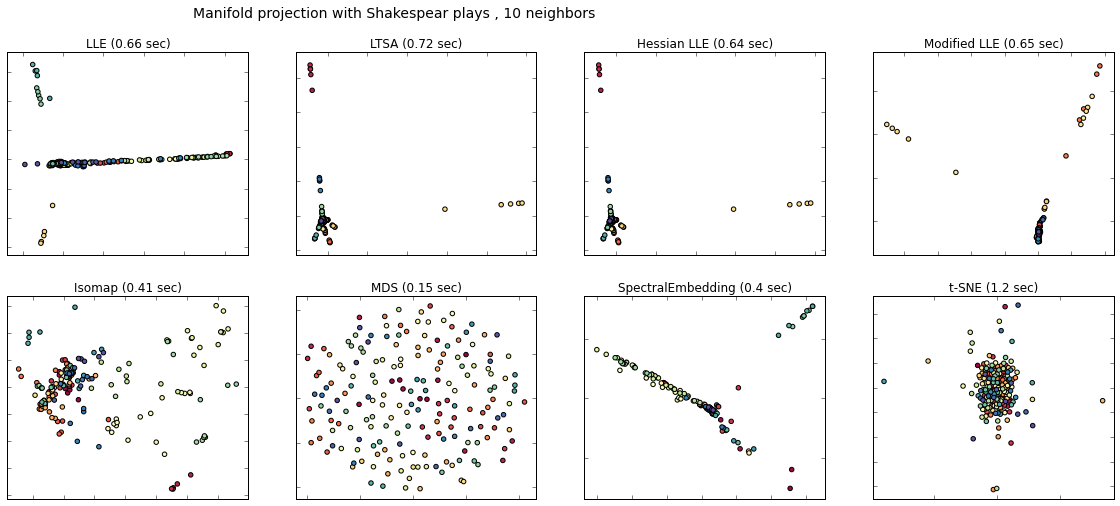

In [8]:
print("\nVisualizing the play_Vect features without labels... \n")
manifold_projection(play_Vect)
print("\nVisualizing the act_Vect features without labels... \n")
manifold_projection(act_Vect)


Visualizing the play_Vect features with labels... 

standard: 0.088 sec
ltsa: 0.11 sec
hessian: 0.097 sec
modified: 0.091 sec
Isomap: 0.029 sec
MDS: 0.018 sec
SpectralEmbedding: 0.071 sec
t-SNE: 0.2 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


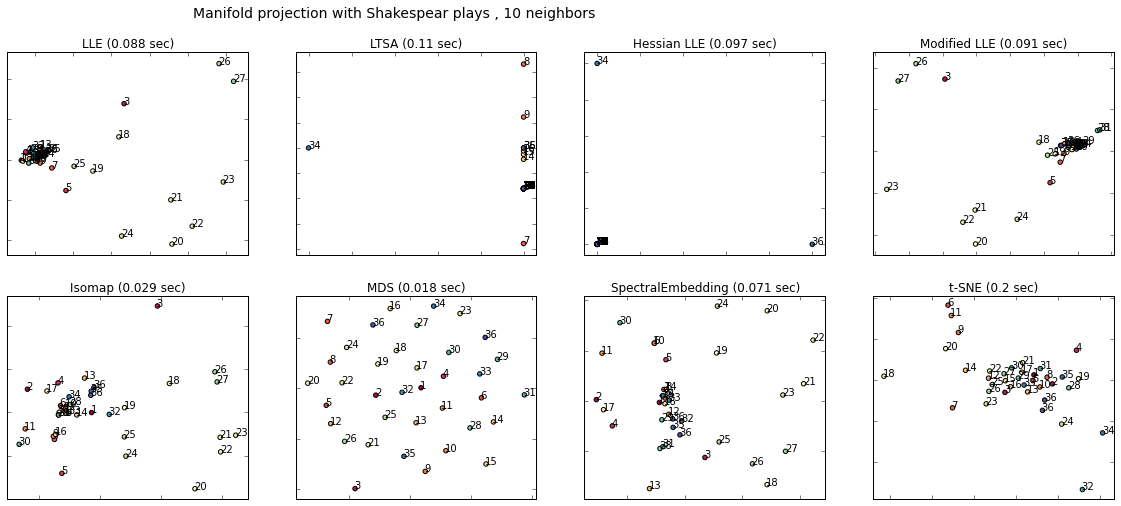


Visualizing the act_Vect features with labels... 

standard: 0.68 sec
ltsa: 0.65 sec
hessian: 0.61 sec
modified: 0.65 sec
Isomap: 0.41 sec
MDS: 0.14 sec
SpectralEmbedding: 0.4 sec
t-SNE: 1.5 sec


C:\Users\ks692\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


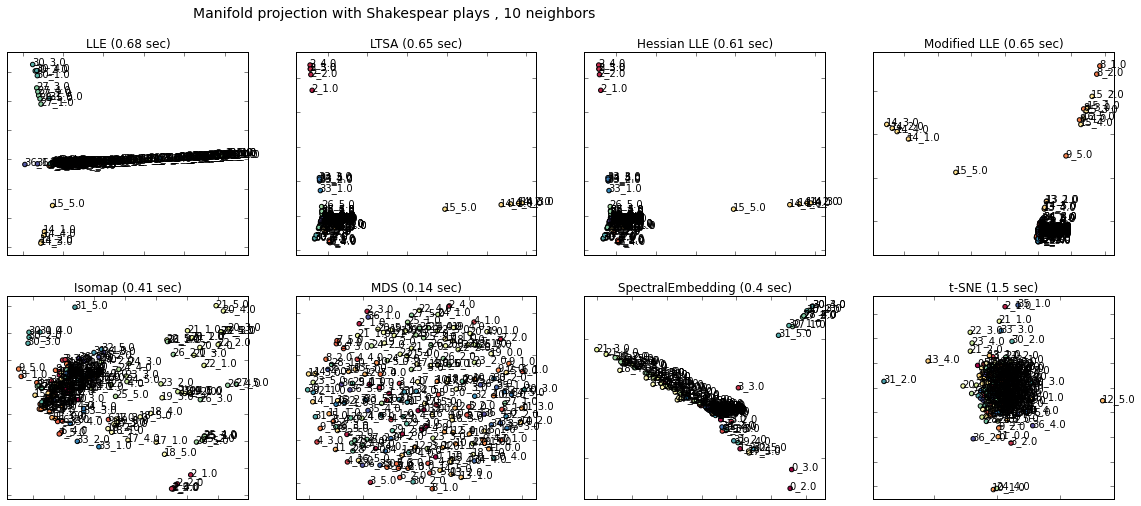

In [11]:
print("\nVisualizing the play_Vect features with labels... \n")
manifold_projection(play_Vect,play_annot)
print("\nVisualizing the act_Vect features with labels... \n")
manifold_projection(act_Vect,act_annot)


Next, we visualize the n-grams features from plays, acts, scenes

In [43]:
act_ngram2 = pd.read_csv('N-gramFeatures/Act_Features_ngram2.txt',sep=',',header = None)
scene_ngram2 = pd.read_csv('N-gramFeatures/Scene_Features_ngram2.txt',sep=',',header = None)
play_ngram2 = pd.read_csv('N-gramFeatures/Play_Features_ngram2.txt',sep=',',header = None)

act_ngram3 = pd.read_csv('N-gramFeatures/Act_Features_ngram3.txt',sep=',',header = None)
scene_ngram3 = pd.read_csv('N-gramFeatures/Scene_Features_ngram3.txt',sep=',',header = None)
play_ngram3 = pd.read_csv('N-gramFeatures/Play_Features_ngram3.txt',sep=',',header = None)

act_ngram4 = pd.read_csv('N-gramFeatures/Act_Features_ngram4.txt',sep=',',header = None)
scene_ngram4 = pd.read_csv('N-gramFeatures/Scene_Features_ngram4.txt',sep=',',header = None)
play_ngram4 = pd.read_csv('N-gramFeatures/Play_Features_ngram4.txt',sep=',',header = None)

PCA first 2 components projection: 0.26 sec


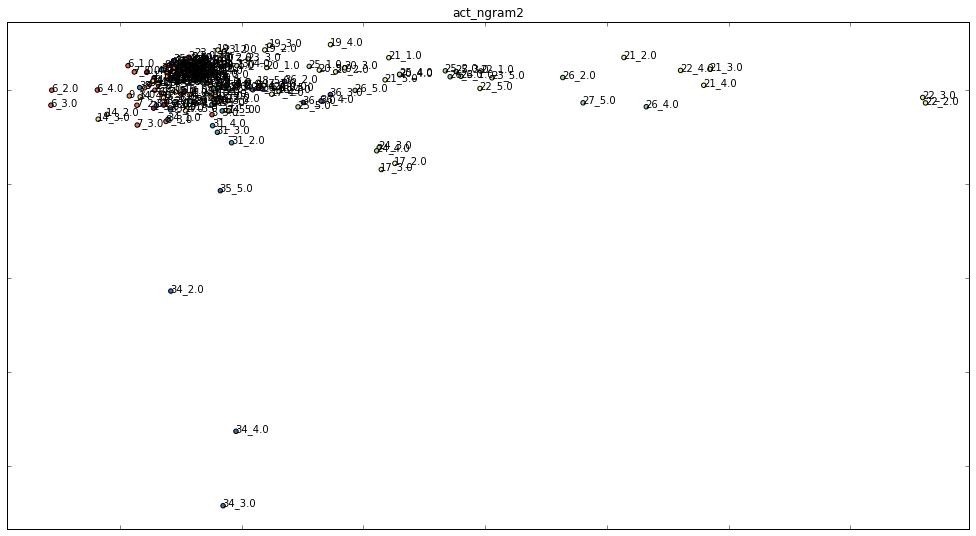

None
PCA first 2 components projection: 1.5 sec


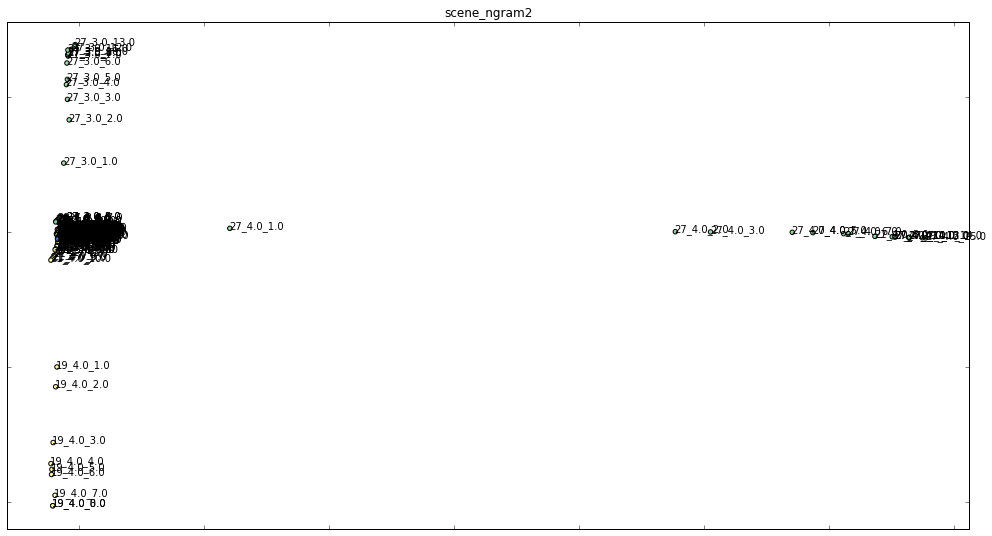

None
PCA first 2 components projection: 0.043 sec


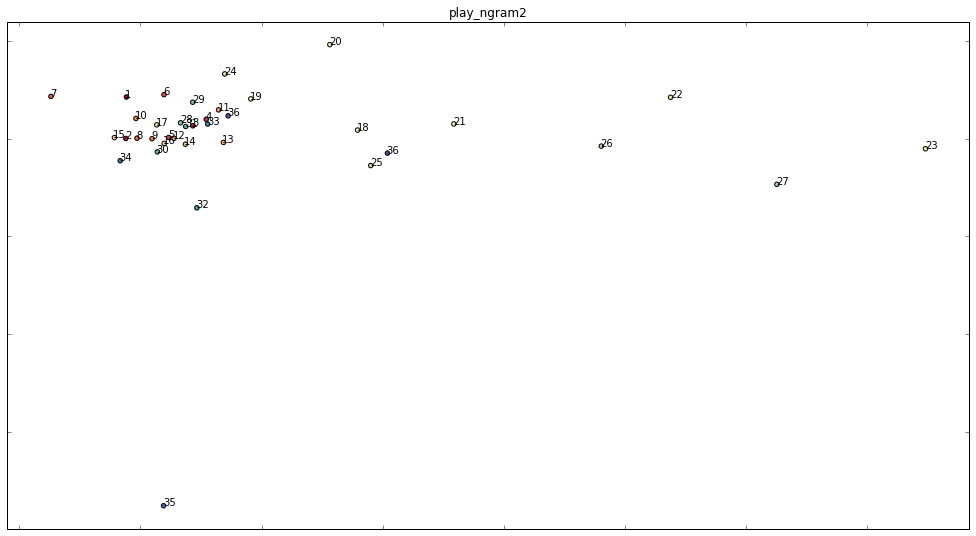

None
PCA first 2 components projection: 0.28 sec


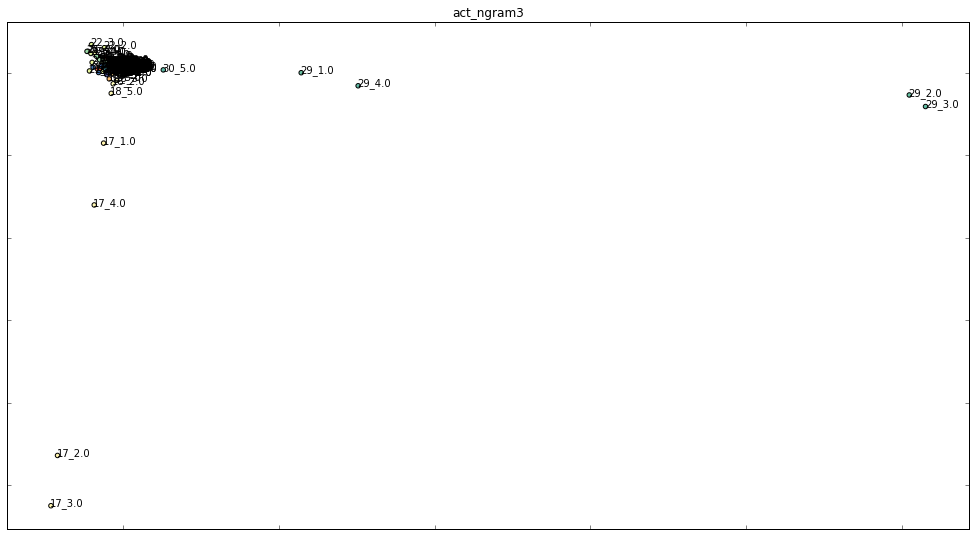

None
PCA first 2 components projection: 1.4 sec


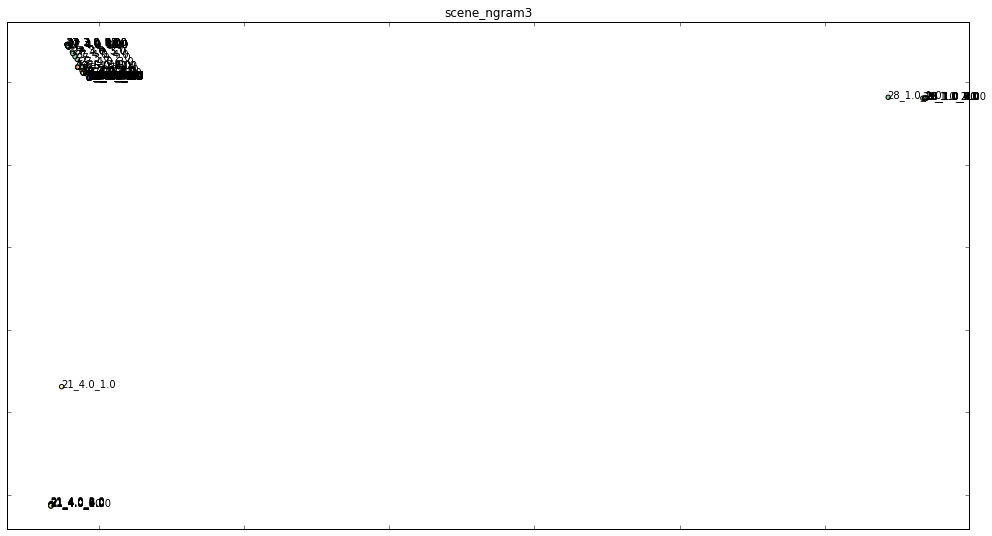

None
PCA first 2 components projection: 0.045 sec


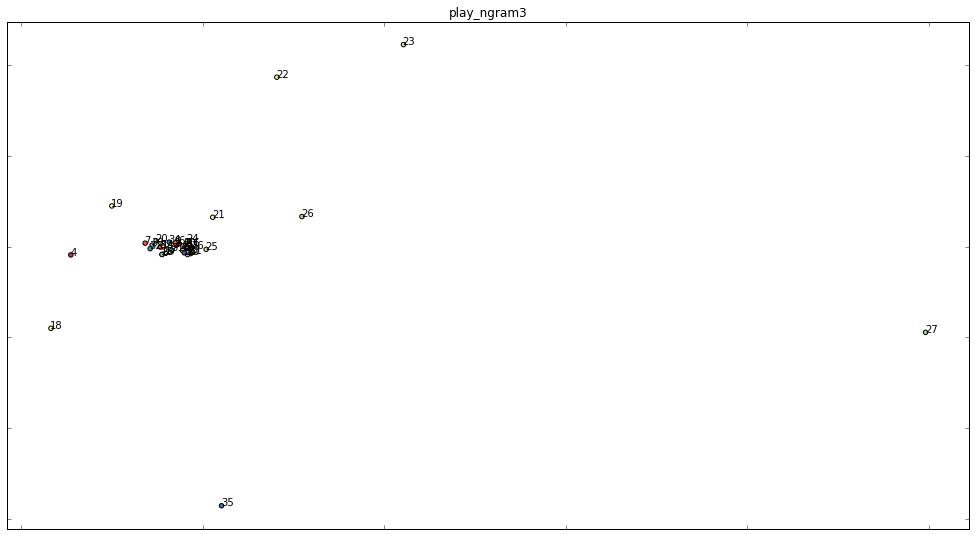

None
PCA first 2 components projection: 0.21 sec


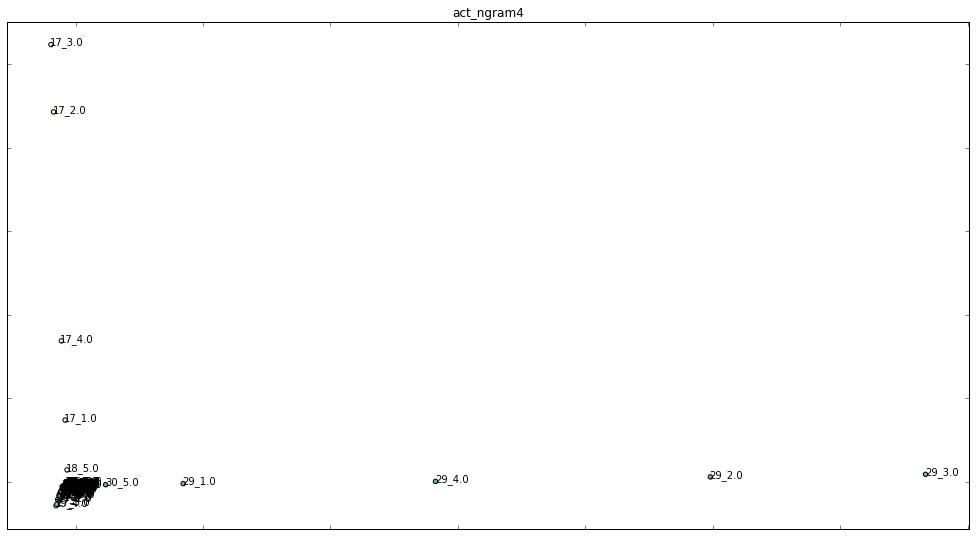

None
PCA first 2 components projection: 1.9 sec


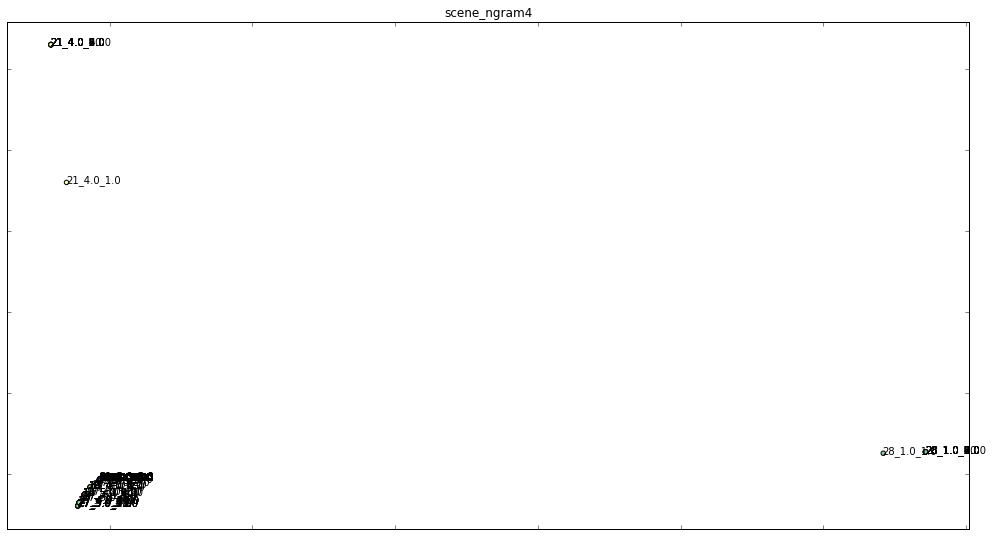

None
PCA first 2 components projection: 0.042 sec


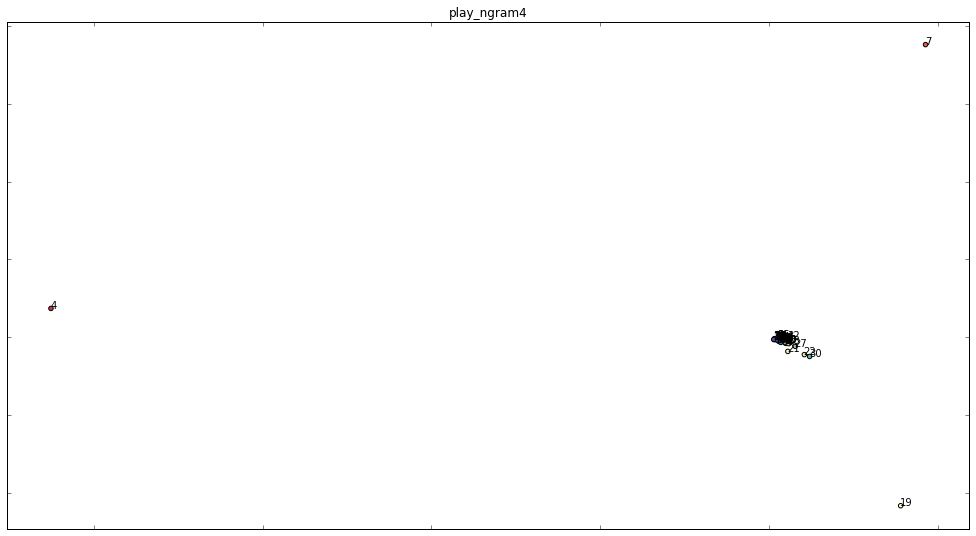

None


In [44]:
ngram_data = [act_ngram2, scene_ngram2, play_ngram2,act_ngram3,scene_ngram3,play_ngram3,act_ngram4,scene_ngram4, play_ngram4]
ngram_titles = ["act_ngram2", "scene_ngram2", "play_ngram2","act_ngram3","scene_ngram3","play_ngram3","act_ngram4","scene_ngram4", "play_ngram4"]
ngram_annot = [act_annot,scene_annot,play_annot,act_annot,scene_annot,play_annot,act_annot,scene_annot,play_annot]

for i in range(len(ngram_data)):
    print(PCA_projection(standardize(ngram_data[i]), ngram_titles[i],ngram_annot[i]))

### Results Analysis
- In the PCA processed 2-grams features from Shakespears’ plays in each act, we see that acts from paly 17,21,22,24,26,27,34,35 are far away from than other plays.
- In the PCA processed 2-grams features from Shakespears’ plays in each scene, we see that scenes from paly 19,27 are far away from than other plays.
- In the PCA processed 2-grams features from Shakespears’ plays in each act, we see that acts from paly 17,21,22,24,26,27,34,35 are far away from than other plays.
- In the PCA processed 3-grams features from Shakespears’ plays in each act, we see that acts from paly 17,29 are far away from than other plays.
- In the PCA processed 3-grams features from Shakespears’ plays in each scene, we see that scenes from paly 21,28 are far away from than other plays.
- In the PCA processed 4-grams features from Shakespears’ plays in each act, we see that acts from paly 17,29 are far away from than other plays which are the same results as analyzed from 3-grams feartures
- In the PCA processed 4-grams features from Shakespears’ plays in each scene, we see that scenes from paly 21,28 are far away from than other plays which are the same results as analyzed from 3-grams feartures